In [2]:
import ROOT as rt

Welcome to JupyROOT 6.18/04


In [3]:
i = rt.TFile("../online/tmp/cent_0_20.root")
o = i.Get('h-lambda')

canvas = rt.TCanvas("canvas")
canvas.SetLogy(0)

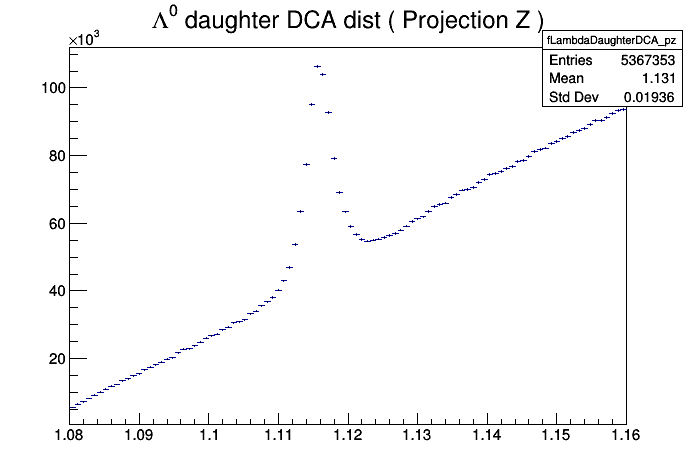

In [4]:
dca_dist = o.FindObject("fLambdaDaughterDCA")
dca_dist.Sumw2()
dca_dist.GetXaxis().SetRangeUser(-2, 2)
dca_dist.GetYaxis().SetRangeUser(-2, 2)

dca_dist.ProjectionZ().Draw()
canvas.Draw()

In [5]:
lsb_left = 1.08
lsb_right = 1.09

lsb_left_bin = dca_dist.GetZaxis().FindBin(lsb_left)
lsb_right_bin = dca_dist.GetZaxis().FindBin(lsb_right)

rsb_left = 1.14
rsb_right = 1.15

rsb_left_bin = dca_dist.GetZaxis().FindBin(rsb_left)
rsb_right_bin = dca_dist.GetZaxis().FindBin(rsb_right)

signal_left = 1.11
signal_right = 1.12

signal_left_bin = dca_dist.GetZaxis().FindBin(signal_left)
signal_right_bin = dca_dist.GetZaxis().FindBin(signal_right)

dca_left = dca_dist.GetXaxis().FindBin(-2)
dca_right = dca_dist.GetXaxis().FindBin(2)

In [6]:
lsb_dist_pion = dca_dist.ProjectionX("lsb_dist_pion", 0, -1, lsb_left_bin, lsb_right_bin)
lsb_dist_proton = dca_dist.ProjectionY("lsb_dist_proton", 0, -1, lsb_left_bin, lsb_right_bin)

rsb_dist_pion = dca_dist.ProjectionX("rsb_dist_pion", 0, -1, rsb_left_bin, rsb_right_bin)
rsb_dist_proton = dca_dist.ProjectionY("rsb_dist_proton", 0, -1, rsb_left_bin, rsb_right_bin)

signal_dist_pion = dca_dist.ProjectionX("signal_dist_pion", 0, -1, signal_left_bin, signal_right_bin)
signal_dist_proton = dca_dist.ProjectionY("signal_dist_proton", 0, -1, signal_left_bin, signal_right_bin)

In [7]:
lsb_dist_pion.Sumw2()
rsb_dist_pion.Sumw2()
signal_dist_pion.Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [8]:
lsb_dist_pion.Scale(1/lsb_dist_pion.Integral())
rsb_dist_pion.Scale(1/rsb_dist_pion.Integral())
signal_dist_pion.Scale(1/signal_dist_pion.Integral())

In [9]:
lsb_dist_pion.SetLineColor(rt.kMagenta)
rsb_dist_pion.SetLineColor(rt.kBlue)
signal_dist_pion.SetLineColor(rt.kGreen+1)

In [10]:
lsb_dist_pion.SetTitle("#Lambda^{0} daughter (pion) DCA")

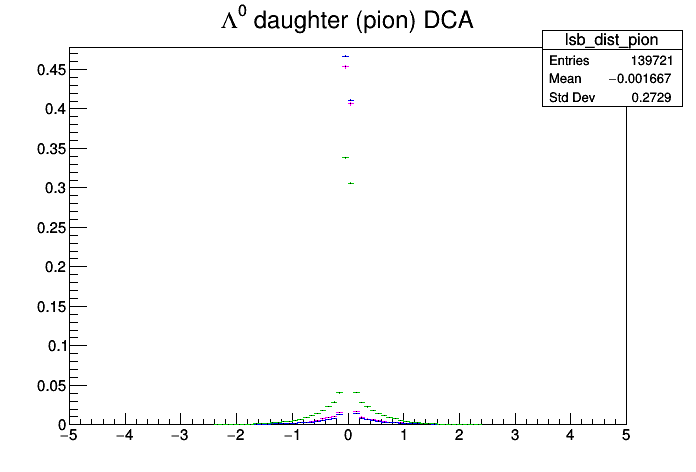

In [11]:
lsb_dist_pion.GetXaxis().SetRangeUser(0, 0)
lsb_dist_pion.Draw()
rsb_dist_pion.Draw("SAME")
signal_dist_pion.Draw("SAME")
canvas.Draw()

In [12]:
lambda_mass = dca_dist.ProjectionZ("lambda_mass", dca_left, dca_right, dca_left, dca_right)
lambda_mass.Rebin(2)
voigt_fit = rt.TF1("voigt_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol1(4)", 1.09, 1.15)

voigt_fit.SetParameter(0, 1.36753e1)
voigt_fit.SetParameter(1, 1.11581)
voigt_fit.SetParameter(2, 1.00576e-05 )
voigt_fit.SetParameter(3, 6.04166e-03)
voigt_fit.SetParameter(4, 1000)
voigt_fit.SetParameter(5, 1000)

voigt_fit.SetNpx(1000)
voigt_fit.SetLineColor(rt.kGreen+3)

lambda_mass.Fit(voigt_fit, "RS")

 FCN=911.906 FROM MIGRAD    STATUS=CONVERGED     667 CALLS         668 TOTAL
                     EDM=9.76597e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.55117e+02   3.60020e+00  -1.42663e-03  -2.65487e-05
   2  p1           1.11595e+00   6.48996e-06   3.93092e-09   2.44797e+00
   3  p2           1.70517e-03   2.22596e-05   6.27046e-09  -9.30733e-01
   4  p3           1.23082e-03   6.18589e-05  -1.36941e-08   5.09213e-01
   5  p4          -2.49346e+06   2.99764e+03   1.20024e+00  -6.54174e-07
   6  p5           2.31450e+06   2.70097e+03  -1.04677e+00  -7.15842e-07


In [13]:
bg_fit = rt.TF1("bg_fit", "pol1(0)", 1.09, 1.15)

bg_fit.SetParameter(0, voigt_fit.GetParameter(4))
bg_fit.SetParameter(1, voigt_fit.GetParameter(5))

bg_fit.SetLineColor(rt.kRed)

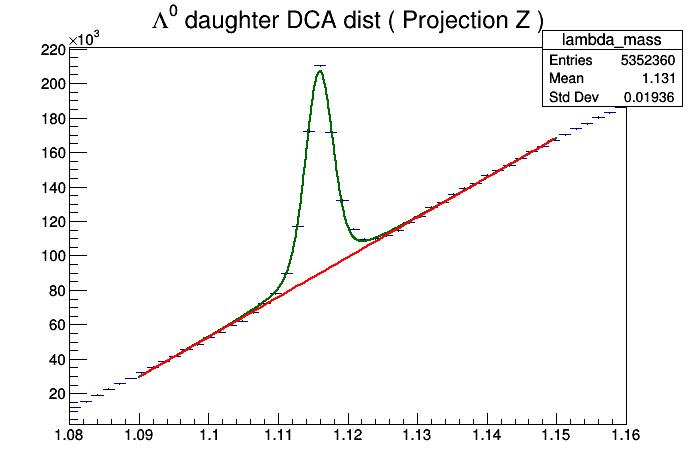

In [14]:
lambda_mass.Draw()
bg_fit.Draw("SAME")
canvas.Draw()

In [15]:
lsb_left = 1.08
lsb_right = 1.09

lsb_left_bin = lambda_mass.GetXaxis().FindBin(lsb_left)
lsb_right_bin = lambda_mass.GetXaxis().FindBin(lsb_right)

rsb_left = 1.14
rsb_right = 1.15

rsb_left_bin = lambda_mass.GetXaxis().FindBin(rsb_left)
rsb_right_bin = lambda_mass.GetXaxis().FindBin(rsb_right)

signal_left = 1.11
signal_right = 1.12

signal_left_bin = lambda_mass.GetXaxis().FindBin(signal_left)
signal_right_bin = lambda_mass.GetXaxis().FindBin(signal_right)

In [16]:
bg_fit_integral = 0
for bin_num in range(signal_left_bin, signal_right_bin+1):
    bin_center = lambda_mass.GetBinCenter(bin_num)
    bg_fit_integral += bg_fit.Eval(bin_center)
peak_integral = lambda_mass.Integral(signal_left_bin, signal_right_bin)

signal = peak_integral - bg_fit_integral
st = signal/peak_integral

print(st)

0.35434484078046086


In [17]:
bg_integral = signal_dist_pion.Integral()*(1-st)
signal_dist_pion.Add(rsb_dist_pion, -1*bg_integral)

True

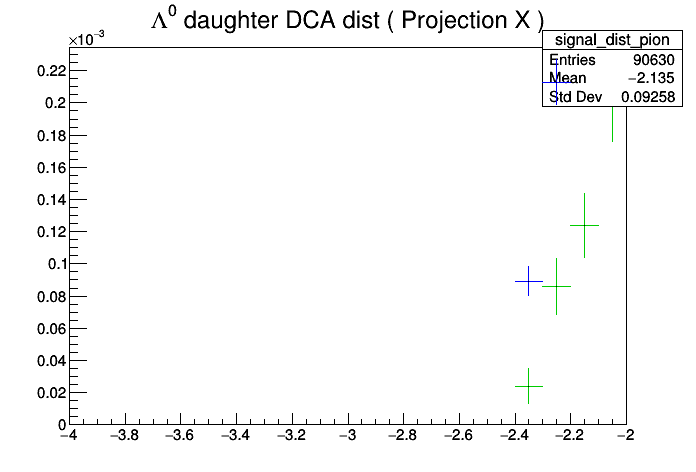

In [18]:
signal_dist_pion.GetXaxis().SetRangeUser(-4, -2)
signal_dist_pion.Draw()
rsb_dist_pion.Draw("SAME")
canvas.Draw()